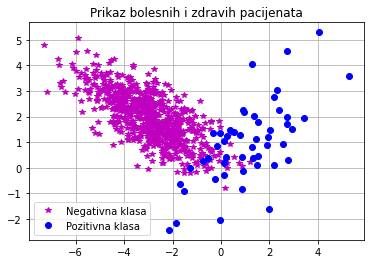

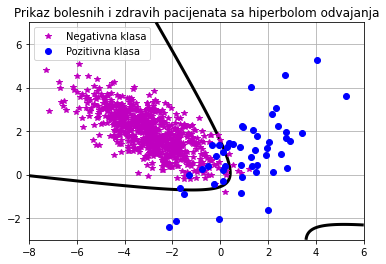

Broj False Negative gresaka: 
0
Broj False Positive gresaka: 
22
Tacnost klasifikatora: 
95.6
P1: 
0.9
P2: 
0.1


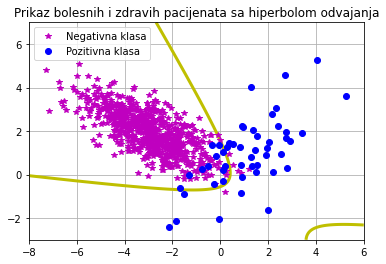

P1: 
0.8
P2: 
0.2


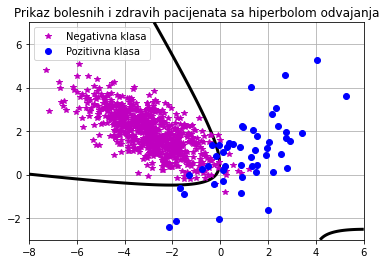

P1: 
0.7000000000000001
P2: 
0.30000000000000004


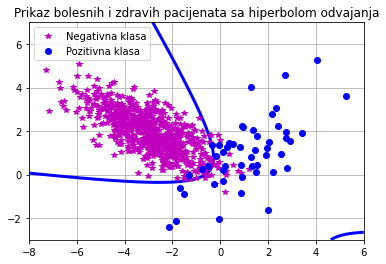

P1: 
0.6000000000000001
P2: 
0.4


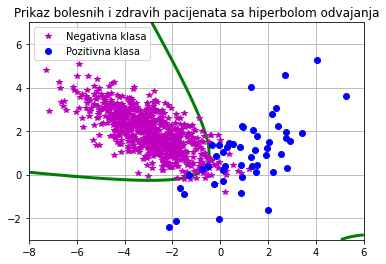

P1: 
0.5000000000000001
P2: 
0.5


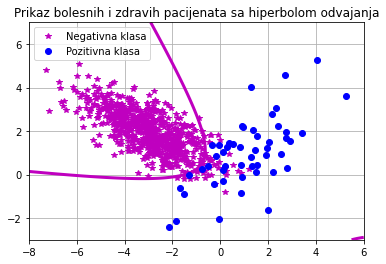

P1: 
0.40000000000000013
P2: 
0.6


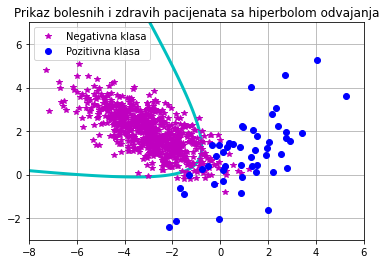

P1: 
0.30000000000000016
P2: 
0.7


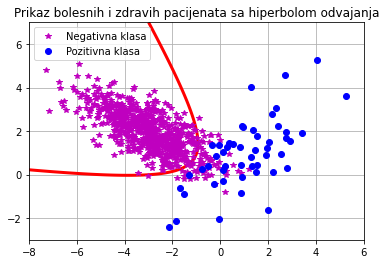

P1: 
0.20000000000000015
P2: 
0.7999999999999999


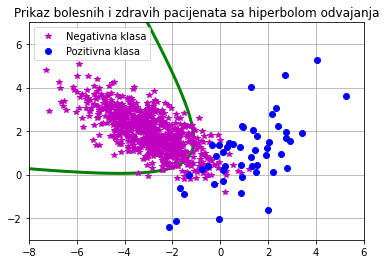

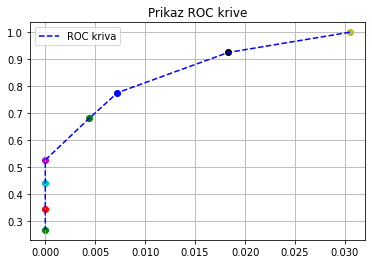

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import linalg
 
 #1
 #_________________________________________
M1=np.array([[-3], [2]])
M2=np.array([[1], [1]])
X1=M1.T         #transponovanje matrice matematickog ocekivanja u vektor srednje vrednosti, funkcija flatten se isto odnosi na to jer mora biti 1d vektor
X2=M2.T
X1=X1.flatten()
X2=X2.flatten()
Sigma1=np.array([[2, -1],[-1, 1]]) 
Sigma2=np.array([[2, 1],[1, 2]])
np.random.seed(0)
 
N1=700
N2=50
 
 #generisanje slucajnog vektora podataka za negativnu klasu
y1, y2 = np.random.multivariate_normal(X1, Sigma1, N1).T
 #generisanje slucajnog vektora podataka za pozitivnu klasu
z1, z2 = np.random.multivariate_normal(X2, Sigma2, N2).T
 
 #crtanje generisanih podataka
plt.plot(y1, y2, '*m',label='Negativna klasa')
plt.plot(z1, z2, 'bo',label='Pozitivna klasa')
plt.legend()
plt.title('Prikaz bolesnih i zdravih pacijenata')
plt.grid(True)
plt.show()
 #___________________________________________________________
 
 #2
 #___________________________________________________________
 #priprema paramtera potrebnih za jednacinu 42 u predavanju 4
invSigma1=linalg.inv(Sigma1)
invSigma2=linalg.inv(Sigma2)
 
m11=M1[0][0]
m12=M1[1][0]
m21=M2[0][0]
m22=M2[1][0]
 
P1=0.9
P2=0.1
 
 #generisanje 2d prostora u kom ce se crtati diskrimnaciona kriva, sa prve slike se vidi da u x osu ide od -8 do 6 a u y osu od -3 do 7
x1pom,x2pom=np.meshgrid(np.linspace(-8, 6, 750),np.linspace(-3, 7, 750))
 
 #ovde sam podelio jednacinu 42 u 3 dela zbog preglednosti i na kraju jednacine se dodaje i clan "-ln(P1/P2)" jer apriorne verovatnoce P1 i P2 nisu jednake
 #s je sam kraj jednacine tj. prethodno pomenuti logaritam kao i logaritam determinanti kovarijacionih matrica
 #h1 je deo jednacine koji se tice inverzne kovarijacione matrice za negativnu klasu, uzimaju se tacke generisane u 2d prostoru uz pomoc x1pom i x2pom
 #h2 je deo jednacine koji se tice inverzne kovarijacione matrice za pozitivnu klasu  uzimaju se tacke generisane u 2d prostoru uz pomoc x1pom i x2pom
 #h cela jednacina 42
s = (1/2)*np.log(linalg.det(Sigma1)/linalg.det(Sigma2))-np.log(P1/P2)
h1 = (1/2)*(((x1pom-m11)*invSigma1[0][0]+(x2pom-m12)*invSigma1[1][0])*(x1pom-m11)+((x1pom-m11)*invSigma1[0][1]+(x2pom-m12)*invSigma1[1][1])*(x2pom-m12))
h2 = (1/2)*(((x1pom-m21)*invSigma2[0][0]+(x2pom-m22)*invSigma2[1][0])*(x1pom-m21)+((x1pom-m21)*invSigma2[1][0]+(x2pom-m22)*invSigma2[1][1])*(x2pom-m22))
h = h1 - h2 + s
 
 #crtanje diskriminacione krive u tacki 0 uz pomoc plt.contour funkcije u dvodimenzionom prostoru x1pom i x2pom koji smo generisali malopre
 #dakle, generisane promenljive x1pom i x2pom predstavljaju oblast u kojoj se predstavlja kriva, a kriva je uz pomoc jednacine 42, elemenata
 #ovih promenljivih i kovarijacionih matrica i matrica ocekivanja generisana
plt.plot(y1, y2, '*m',label='Negativna klasa')
plt.plot(z1, z2, 'bo',label='Pozitivna klasa')
plt.contour(x1pom, x2pom, h, [0], colors='k', linewidths=3)
plt.title('Prikaz bolesnih i zdravih pacijenata sa hiperbolom odvajanja')
plt.grid(True)
plt.legend()
plt.show()
 
#______________________________________________________________________
 
#3
#______________________________________________________________________
 
 #ponovo koristimo jednacinu 42, samo ovog puta sa podacima slucajno generisanim za negativnu klasu y1 i y2, ovo nam je potrebno da bi smo
 #mogli da odredimo koji podaci zaista pripadaju negativnoj klasi a koji su lazno negativni (False Negative)
b1 = (1/2)*(((y1-m11)*invSigma1[0][0]+(y2-m12)*invSigma1[1][0])*(y1-m11)+((y1-m11)*invSigma1[0][1]+(y2-m12)*invSigma1[1][1])*(y2-m12))
b2 = (1/2)*(((y1-m21)*invSigma2[0][0]+(y2-m22)*invSigma2[1][0])*(y1-m21)+((y1-m21)*invSigma2[1][0]+(y2-m22)*invSigma2[1][1])*(y2-m22))
b3 = b1 - b2 + s
 
 
 #prolazimo kroz svaki element vektora b3 koji sadrzi odbirke nase negativne klase, ukoliko je odbirak veci od praga ln(P1/P2), taj element je pogresno prijavljen
 #kao negativan
greskaFN=0
greskaFP=0
for i in range(0, N1):
  if b3[i]>np.log(P1/P2):
    greskaFN=greskaFN+1
 
 #isto kao i malopre koristimo jednacinu 42, samo ovog puta sa slucajnim podacima generisanim za pozitivnu klasu z1 i z2 kako bi smo odredili koji podaci
 #zaista pripadaju pozitivnoj klasi a koji su pogresno prijavljeni kao pozitivni (False Positive)
p1 = (1/2)*(((z1-m11)*invSigma1[0][0]+(z2-m12)*invSigma1[1][0])*(z1-m11)+((z1-m11)*invSigma1[0][1]+(z2-m12)*invSigma1[1][1])*(z2-m12))
p2 = (1/2)*(((z1-m21)*invSigma2[0][0]+(z2-m22)*invSigma2[1][0])*(z1-m21)+((z1-m21)*invSigma2[1][0]+(z2-m22)*invSigma2[1][1])*(z2-m22))
p3 = p1 - p2 + s
#prolazimo kroz svaki element vektora p3 koji sadrzi odbirke nase pozitivne klase, ukoliko je odbirak manji od praga ln(P1/P2), taj element je pogresno prijavljen
 #kao pozitivan
for i in range(0, N2):
  if p3[i]<np.log(P1/P2):
    greskaFP=greskaFP+1
  
 #racunanje Bajesove greske za negativnu i za pozitivnu klasu
Eps1=(greskaFN)/(N1)
Eps2=(greskaFP)/(N2)
 
 #racunanje ukupne Bajesove greske P i tacnosti klasifikatora T (pomnozeno sa 100 da bi bilo u procentima)
P=P1*Eps1+P2*Eps2
T=(1-P)*100
 
print("Broj False Negative gresaka: ")
print(greskaFN)
print("Broj False Positive gresaka: ")
print(greskaFP)
print("Tacnost klasifikatora: ")
print(T)
 #__________________________________________________________
 
 #4 i deo 5
 
 #__________________________________________________________
 
#niz boja koje se koriste za sve razlicite vrednosti P1 i P2 koje cemo imati u petlji
colors=['y' ,'k', 'b', 'g', 'm', 'c', 'r', 'g', 'r']
 
 #priprema nizova koji ce sadrzati nas False Positive Rate i True Positive Rate za sve razlicite vrednosti P1 i P2 koje cemo imati
 #Ova dva podatka su nam potrebna da bi smo mogli da nacrtamo ROC krivu jer je x osa na ROC krivoj FPR a TPR je y osa
FPRniz=np.empty([0,0])
TPRniz=np.empty([0,0])
 
for i in range(0,8):
  print("P1: ")
  print(P1)
  print("P2: ")
  print(P2)
 
  #racunanje poslednjeg clana s u jednacini koji zavisi od P1 i P2 posto imamo novu vrednost oba parametra
  s = (1/2)*np.log(linalg.det(Sigma1)/linalg.det(Sigma2))-np.log(P1/P2)
  #racunanje nove funkcije za diskriminatornu krivu, kao i za vektore pomocu kojih odredjujemo false negative i false positive greske
  h = h1 - h2 + s
  b3 = b1 - b2 + s
  p3 = p1 - p2 + s
  plt.plot(y1, y2, '*m',label='Negativna klasa')
  plt.plot(z1, z2, 'bo',label='Pozitivna klasa')
  plt.contour(x1pom, x2pom, h, [0], colors=colors[i], linewidths=3)
  plt.title('Prikaz bolesnih i zdravih pacijenata sa hiperbolom odvajanja')
  plt.grid(True)
  plt.legend()
  plt.show()
  
  #sve ispod ovoga se tice tacke 5
 
  #inicijalizacija pravih i laznih prijava pozitivnih i negativnih vrednosti u klasama (mora se postaviti na 0 u svakoj iteraciji petlje jer se menjaju vrednosti P1 i P2)
  FP=0
  TP=0
  TN=0
  FN=0
  
  #provera svakog clana negativne klase u vektoru b3, ako mu je vrednost veca od praga u pitanju je lazna prijava, ako je manja u pitanju je stvarno negativan element
  for i in range(0, N1):
    if b3[i]>np.log(P1/P2):
      FN = FN+1
    else:
      TN = TN+1
 
 #provera svakog clana pozitivne klase u vektoru p3, ako mu je vrednost veca od praga u pitanju je lazna prijava, ako je manja u pitanju je stvarno pozitivan element
  for i in range(0, N2):
    if p3[i]<np.log(P1/P2):
      FP = FP+1
    else:
      TP = TP+1
 
 #formule iz predavanja 7 za racunanje False Positive i True Positive Rate
  FPR=(FP)/(FP+TN)
  TPR=(TP)/(TP+FN)
  #u nizove za FPR i TPR dodajemo vrednost koju smo upravo izracunali za trenutne vrednosti P1 i P2, ukupno ce biti 8 vrednosti jer toliko imamo kombinacija P1 i P2
  FPRniz=np.append(FPRniz,FPR)
  TPRniz=np.append(TPRniz,TPR)
  #Posto smo poceli sa P1=0.9 i P2=0.1, u svakoj iteraciji petlje cemo P1 smanjivati a P2 povecavati
  P1=P1-0.1
  P2=P2+0.1
  
 #__________________________________________________________________
 
 #ostatak tacke 5
 #__________________________________________________________________
 
#prikaz svake tacke u nizovima FPR i TPR vrednosti u 2D prostoru
for i in range(len(FPRniz)):
  plt.scatter(FPRniz[i],TPRniz[i],c=colors[i])
 
#crtanje ROC krive koja prolazi kroz svaku tacku koja je generisana na osnovu vrednosti u FPR i TPR nizovima
plt.plot(FPRniz, TPRniz,  'b--',label='ROC kriva')
plt.title('Prikaz ROC krive')
plt.grid(True)
plt.legend()
plt.show()
 
#_________________________________________________________________